## Exploratory Data Analysis (EDA) and Data Visualization

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Basic EDA

 #### Load the CSV into a Pandas DataFrame.

In [6]:
df = pd.read_csv("quotes.csv")

##### Displaying the First 5 Rows of the Dataset

In [7]:
print(df.head(5))

            Author                                              Quote  \
0  Albert Einstein  “The world as we have created it is a process ...   
1  Albert Einstein  “The world as we have created it is a process ...   
2  Albert Einstein  “The world as we have created it is a process ...   
3  Albert Einstein  “The world as we have created it is a process ...   
4     J.K. Rowling  “It is our choices, Harry, that show what we t...   

            Tags  
0         change  
1  deep-thoughts  
2       thinking  
3          world  
4      abilities  


##### Dataset Information 

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Author  235 non-null    object
 1   Quote   235 non-null    object
 2   Tags    232 non-null    object
dtypes: object(3)
memory usage: 5.6+ KB
None


##### Checking for Missing Values

In [9]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Author    0
Quote     0
Tags      3
dtype: int64


In [12]:
df['Tags'] = df['Tags'].fillna("Unknown")


In [13]:
print(df.isnull().sum())

Author    0
Quote     0
Tags      0
dtype: int64


##### basic statistics

In [17]:
print(f"Total Quotes: {df.shape[0]}")
print(f"Unique Authors: {df['Author'].nunique()}")
print(f"Total Tags: {df['Tags'].nunique()}")

Total Quotes: 235
Unique Authors: 50
Total Tags: 138


### step 2: Data Visualization

#### Bar chart of the top 10 most quoted authors.

In [19]:
top_authors = df['Author'].value_counts().head(10)
print(top_authors)


Author
Albert Einstein      25
Jane Austen          15
Mark Twain           14
Marilyn Monroe       14
C.S. Lewis           13
J.K. Rowling         12
Dr. Seuss            11
John Lennon           8
Elie Wiesel           8
Madeleine L'Engle     7
Name: count, dtype: int64


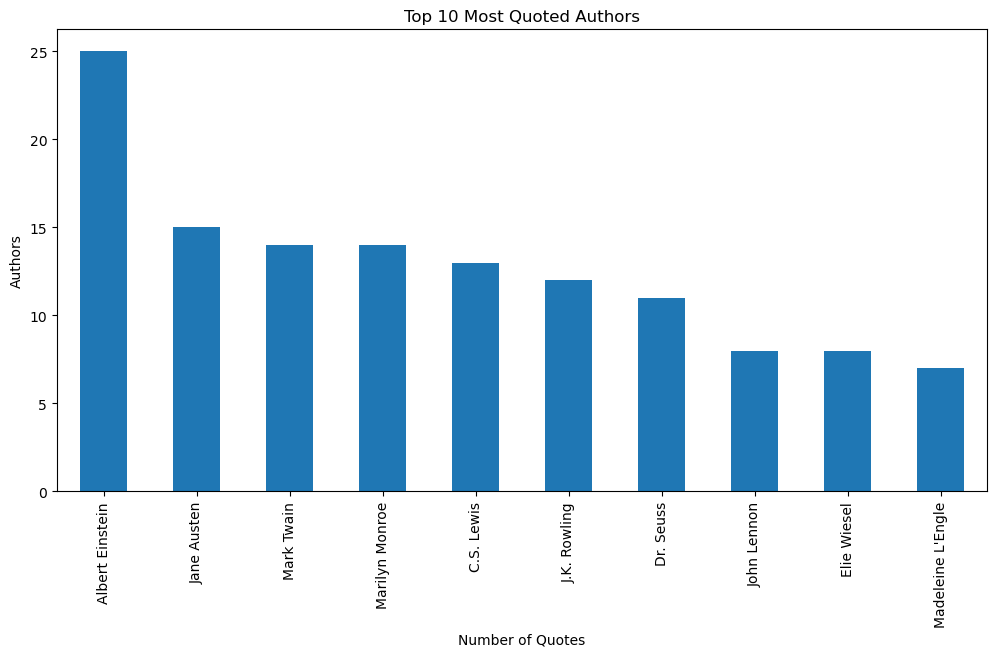

In [20]:
plt.figure(figsize=(12,6))
top_authors.plot(kind="bar")
plt.xlabel("Number of Quotes")
plt.ylabel("Authors")
plt.title("Top 10 Most Quoted Authors")
plt.show()

#### Word cloud of the most common words in the quotes.

In [21]:
pip install wordcloud

In [22]:
from wordcloud import WordCloud

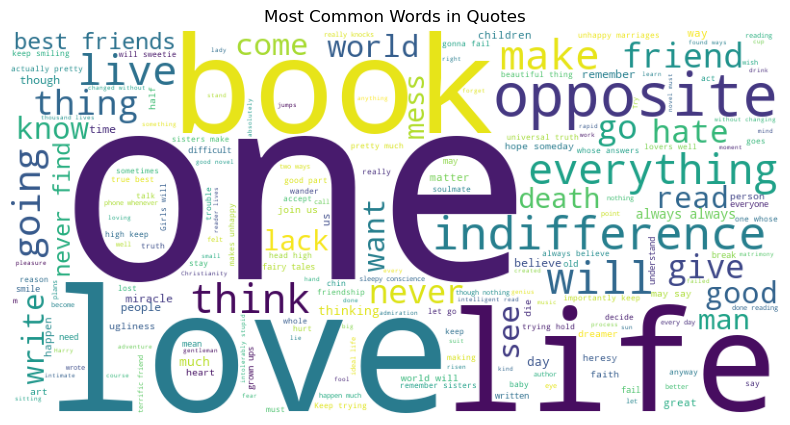

In [24]:
text = " ".join(df['Quote'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Common Words in Quotes")
plt.show()


#### Pie Chart: Proportion of Top 5 Tags

In [25]:
top_tags = df["Tags"].value_counts().head(5)


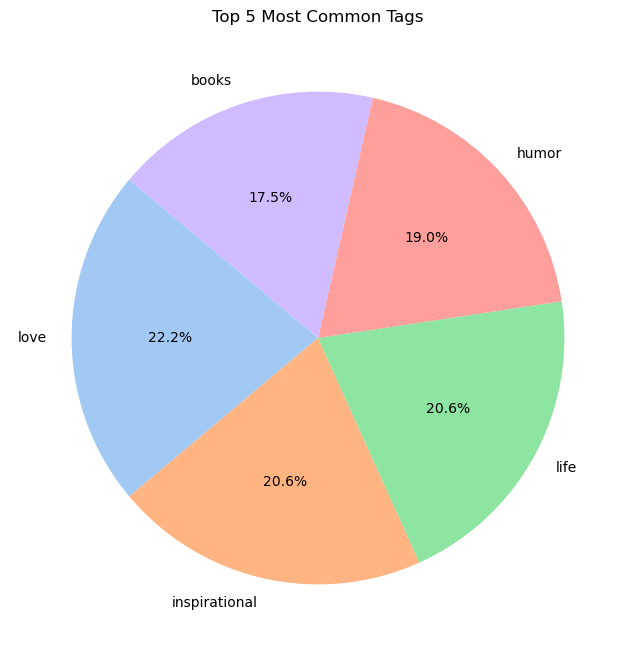

In [28]:
plt.figure(figsize=(8, 8))
plt.pie(top_tags, labels=top_tags.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"), startangle=140)
plt.title("Top 5 Most Common Tags")
plt.show()

#### Additional Visualization: Quotes Length Distribution

In [29]:

df["quote_length"] = df["Quote"].apply(len)

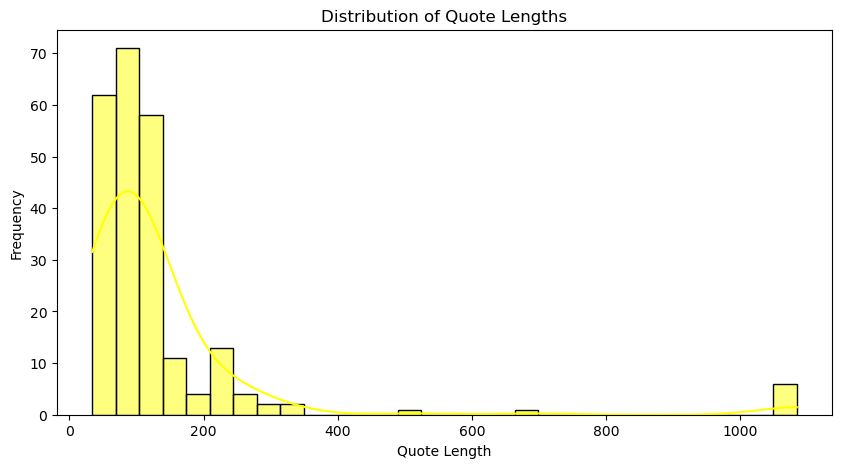

In [30]:

plt.figure(figsize=(10, 5))
sns.histplot(df["quote_length"], bins=30, kde=True, color="Yellow")
plt.xlabel("Quote Length")
plt.ylabel("Frequency")
plt.title("Distribution of Quote Lengths")
plt.show()

##### Distribution of Quote Lengths

##### Goal: Show how the length of quotes varies across the dataset.


In [31]:

# Calculate the length of each quote
df['quote_length'] = df['Quote'].apply(len)

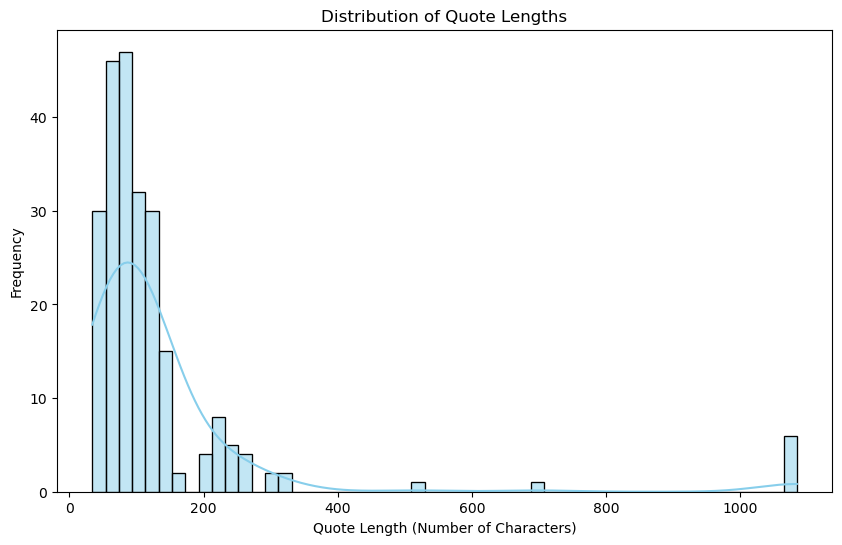

In [32]:

# Histogram of quote lengths
plt.figure(figsize=(10,6))
sns.histplot(df['quote_length'], kde=True, color='skyblue')
plt.title("Distribution of Quote Lengths")
plt.xlabel("Quote Length (Number of Characters)")
plt.ylabel("Frequency")
plt.show()

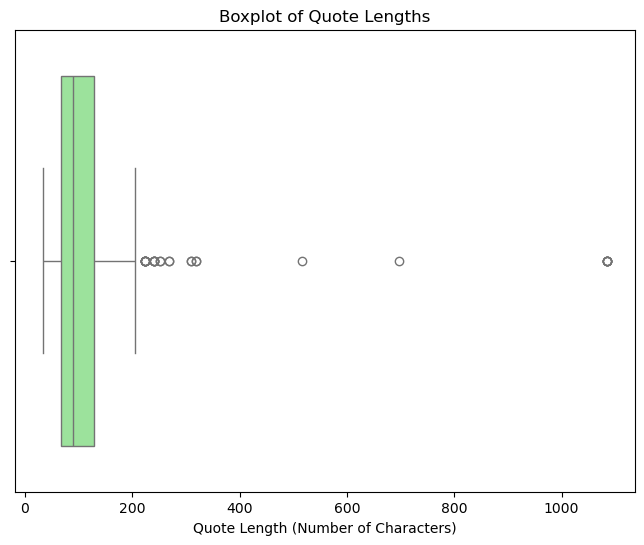

In [33]:
# Box plot of quote lengths
plt.figure(figsize=(8,6))
sns.boxplot(x=df['quote_length'], color='lightgreen')
plt.title("Boxplot of Quote Lengths")
plt.xlabel("Quote Length (Number of Characters)")
plt.show()

#### Quote Count per Tag


##### Goal: Visualize which tags are associated with the most quotes.

In [34]:
# Count the number of quotes for each tag
tag_counts = df['Tags'].value_counts()

# Select the top 10 most common tags
top_10_tags = tag_counts.head(10)

C:\Users\SANGEETHA\AppData\Local\Temp\ipykernel_4832\280307095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_tags.index, y=top_10_tags.values, palette='Set2')


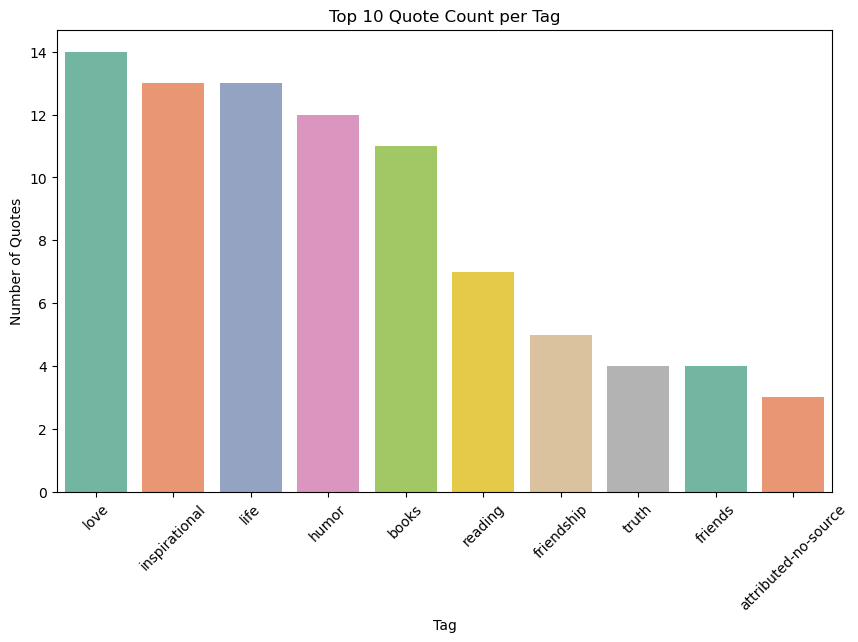

In [38]:


# Bar plot of quote count per tag (top 10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_tags.index, y=top_10_tags.values, palette='Set2')
plt.xticks(rotation=45)
plt.title("Top 10 Quote Count per Tag")
plt.xlabel("Tag")
plt.ylabel("Number of Quotes")
plt.show()

##### Quote Distribution by Author


##### Goal: Show how the number of quotes varies by author.

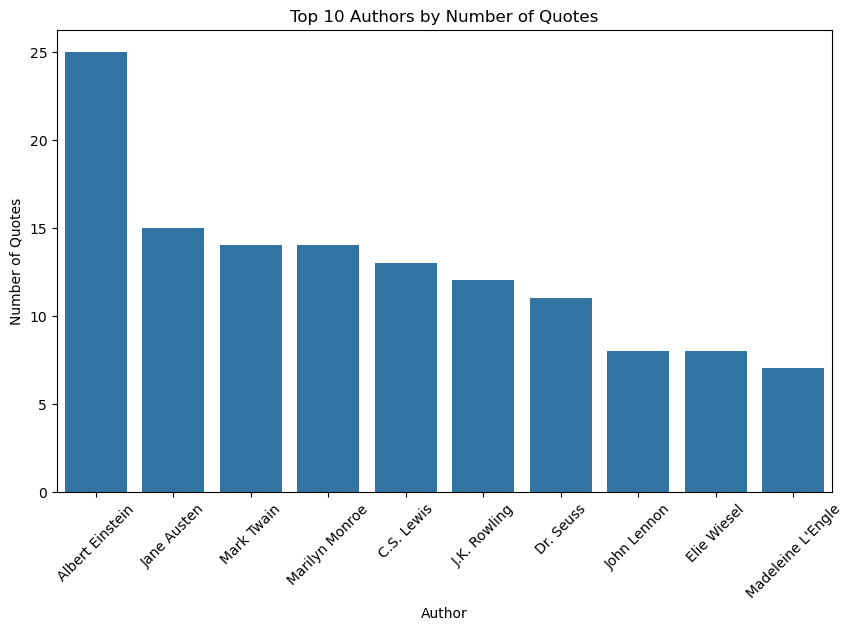

In [37]:

# Count quotes per author
author_counts = df['Author'].value_counts().head(10)

# Bar plot of quote counts per author
plt.figure(figsize=(10,6))
sns.barplot(x=author_counts.index, y=author_counts.values)
plt.xticks(rotation=45)
plt.title("Top 10 Authors by Number of Quotes")
plt.xlabel("Author")
plt.ylabel("Number of Quotes")
plt.show()